# Mfundo Monchwe
# Taryn Michael

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
from IPython.display import Image
Image('image.png')

In [ ]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"

--2021-10-28 13:40:00--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M   559KB/s    in 11s     

2021-10-28 13:40:12 (524 KB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2021-10-28 13:40:12--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-10-28 13:40:13 (142 MB/s) - ‘Indian_pines_gt.mat’ saved [1125/1125]



In [ ]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  sample_data


In [ ]:
#reading the data
indian_pines = sio.loadmat('Indian_pines_corrected.mat')
ground_truth = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [ ]:
indian_pines.keys()

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])

In [ ]:
indian_pines_key=list(indian_pines.keys())
indian_pines_IN = (indian_pines[indian_pines_key[3]])
print(indian_pines_IN)

[[[3172 4142 4506 ... 1057 1020 1020]
  [2580 4266 4502 ... 1064 1029 1020]
  [3687 4266 4421 ... 1061 1030 1016]
  ...
  [2570 3890 4320 ... 1042 1021 1015]
  [3170 4130 4320 ... 1054 1024 1020]
  [3172 3890 4316 ... 1043 1034 1016]]

 [[2576 4388 4334 ... 1047 1030 1006]
  [2747 4264 4592 ... 1055 1039 1015]
  [2750 4268 4423 ... 1047 1026 1015]
  ...
  [3859 4512 4605 ... 1056 1035 1015]
  [3686 4264 4690 ... 1051 1012 1020]
  [2744 4268 4597 ... 1047 1019 1016]]

 [[2744 4146 4416 ... 1055 1029 1025]
  [2576 4389 4416 ... 1051 1021 1011]
  [2744 4273 4420 ... 1068 1033 1010]
  ...
  [2570 4266 4509 ... 1051 1025 1010]
  [2576 4262 4496 ... 1047 1029 1020]
  [2742 4142 4230 ... 1042 1025 1011]]

 ...

 [[3324 3728 4002 ... 1003 1004 1004]
  [2983 3604 3829 ... 1011 1013 1008]
  [2988 3612 3913 ... 1012 1001 1004]
  ...
  [2564 4115 4103 ... 1003 1005 1013]
  [2730 4111 4103 ... 1015 1013 1004]
  [3156 3991 4103 ... 1017 1014 1000]]

 [[3161 3731 3834 ... 1002 1000 1000]
  [2727 3742

In [ ]:

print(indian_pines_IN.shape)

(145, 145, 200)


In [ ]:
def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

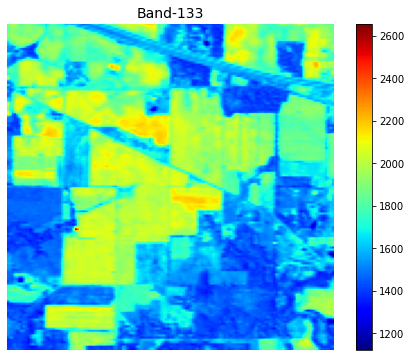

In [ ]:
plot_band(indian_pines_IN)

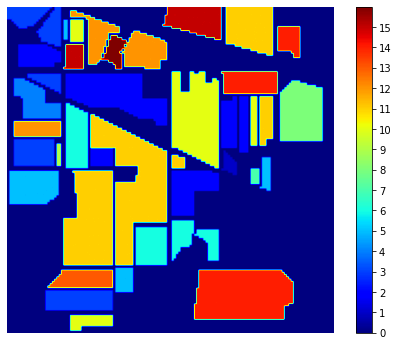

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

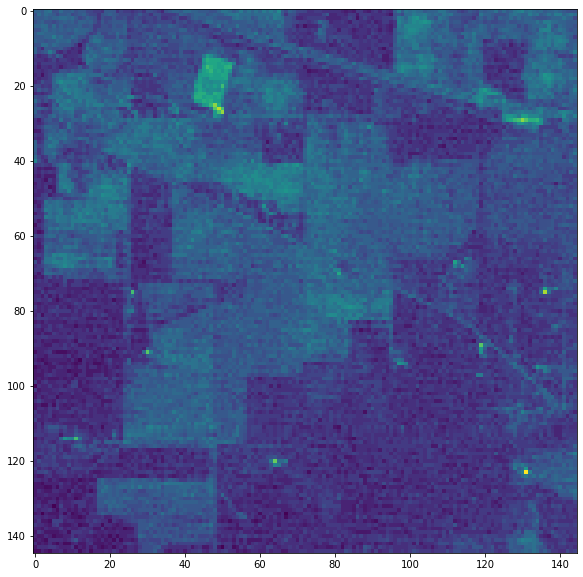

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.imshow(indian_pines_IN[:,:,2], interpolation='nearest')
plt.show()

In [ ]:
from tqdm import tqdm
import pandas as pd

In [ ]:
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [ ]:
df = extract_pixels(indian_pines_IN, ground_truth)

100%|██████████| 200/200 [00:00<00:00, 338.90it/s]


In [ ]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,band-11,band-12,band-13,band-14,band-15,band-16,band-17,band-18,band-19,band-20,band-21,band-22,band-23,band-24,band-25,band-26,band-27,band-28,band-29,band-30,band-31,band-32,band-33,band-34,band-35,band-36,band-37,band-38,band-39,band-40,...,band-162,band-163,band-164,band-165,band-166,band-167,band-168,band-169,band-170,band-171,band-172,band-173,band-174,band-175,band-176,band-177,band-178,band-179,band-180,band-181,band-182,band-183,band-184,band-185,band-186,band-187,band-188,band-189,band-190,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,3591,...,1396,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,3987,...,1421,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,4027,...,1446,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,4086,...,1432,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,3779,...,1401,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [ ]:
df.shape

(21025, 201)

In [ ]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


In [ ]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

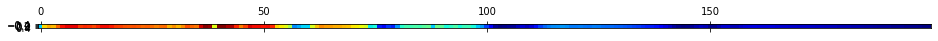

In [ ]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,200), cmap='jet');

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

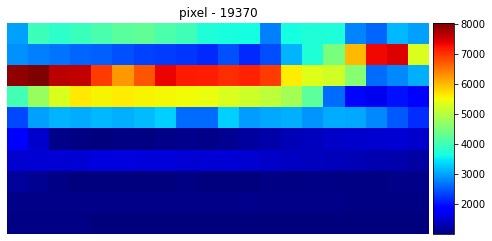

In [ ]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

In [ ]:
import seaborn as sns

Enter the band Number(1-200) :20


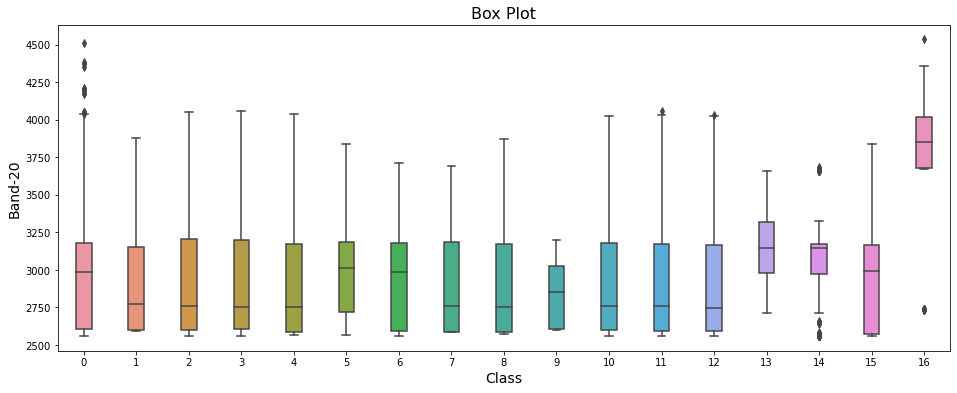

In [ ]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

In [ ]:
# Distribution plot
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 20: 

count    21025.000000
mean      3861.227491
std        862.120047
min       2560.000000
25%       3056.000000
50%       3863.000000
75%       4552.000000
max       7307.000000
Name: band-20, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


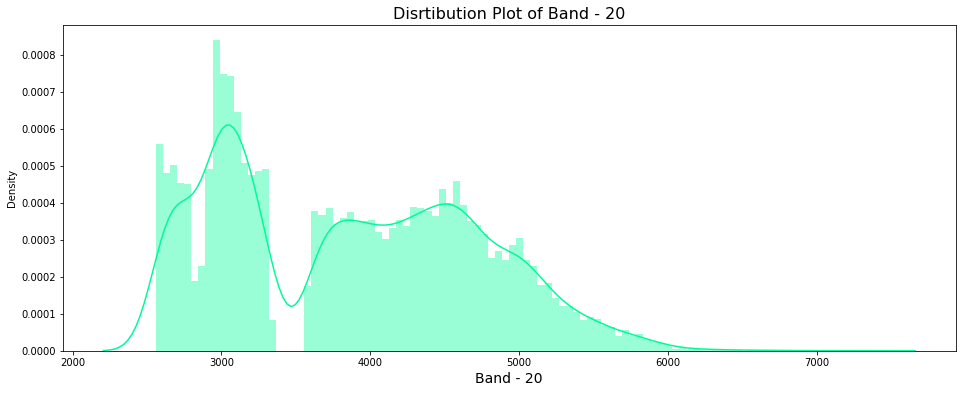

In [ ]:
plt.figure(figsize=(16, 6))
sns.distplot(df['band-'+str(n)], color='mediumSpringGreen', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()

In [ ]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

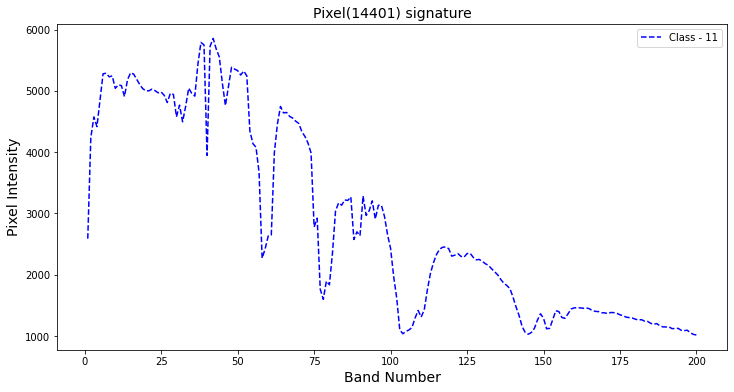

In [ ]:
plot_signature(df)

In [ ]:
df.to_csv('Dataset.csv', index=False)

Dimensionality Reduction using PCA

Now we will check how to do the Dimensionality Reduction (DR) of hyperspectral images and why do we need to do the DR. As we know, hyperspectral imagery has several spectral bands it requires large time and space to process and store these images. Reduction in the number of spectral channels can be possible by DR techniques, which can further lead to the improvement in the performance. How can we choose which band to remove or which band is more important? It can be done fixed using DR methods. Some of the DR methods are PCA, NMF, SVD etc.

We will look into one of the most widely used DR techniques called Principal Component Analysis (PCA). It is a linear dimensionality reduction technique, which works based on the correlation and variance of the band. It will try to keep the bands with maximum variance. This is calculated purely based on eigenvalues and eigenvectors. Scale the data

Standardize the dataset since PCA has an impact on the scale of the data. Before that reshape the data into 2D form because PCA and Standard scaler accept 2D data

In [ ]:
indian_pine_data = indian_pines_IN.reshape(np.prod(indian_pines_IN.shape[:2]),np.prod(indian_pines_IN.shape[2:]))

# New shape of the data is
print(indian_pine_data.shape)

(21025, 200)


In [ ]:
print(indian_pine_data)

[[3172 4142 4506 ... 1057 1020 1020]
 [2580 4266 4502 ... 1064 1029 1020]
 [3687 4266 4421 ... 1061 1030 1016]
 ...
 [3153 3864 4282 ... 1003 1008 1000]
 [3155 4104 4106 ... 1011 1005 1003]
 [3323 3860 4197 ... 1007 1004 1000]]


In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler
indian_pine_data = StandardScaler().fit_transform(indian_pine_data)

In [ ]:
# check shape of the data-

print(indian_pine_data.shape)

(21025, 200)


In [ ]:
# Now by looking at the data it can be observed how the data has changed or scaled.
#Here we are going to reduce the dimensions from 200 to 20.

from sklearn.decomposition import PCA
pca_decompostn = PCA(n_components=20)
indian_pine_data_pca = pca_decompostn.fit_transform(indian_pine_data)

In [ ]:
# You can find the amount of information provided by each band using explained_variance_ratio_.

print(pca_decompostn.explained_variance_ratio_)

[0.6861814  0.19194106 0.0256119  0.01686552 0.01049086 0.00840367
 0.00470794 0.00392647 0.00372137 0.00346936 0.00284681 0.00245579
 0.00214135 0.00197491 0.00185902 0.00180099 0.00174066 0.00158012
 0.0015403  0.0014985 ]


From the above result we can say that almost 68% of information is present in 1 st principal component and 19% in second principal component and so on

In [ ]:
print(indian_pine_data_pca.shape)

(21025, 20)


In [ ]:
#To reshape the array-

indian_pine_data_pca_new = indian_pine_data_pca.reshape(145,145,20)
print(indian_pine_data_pca_new.shape)

(145, 145, 20)


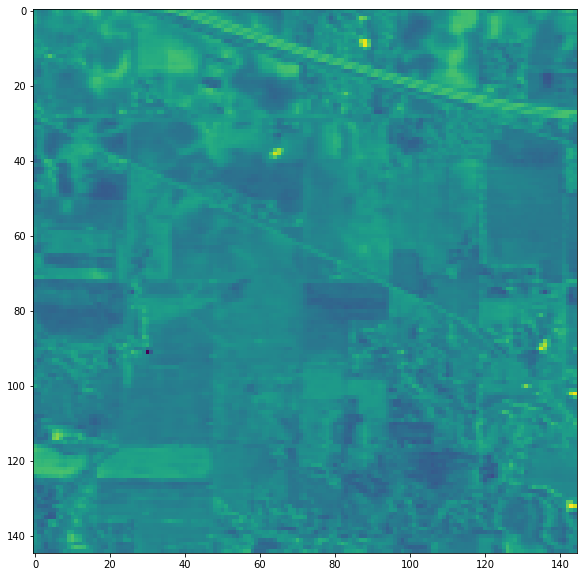

In [ ]:
#To display one band data-

fig = plt.figure(figsize = (10,10))
plt.imshow(indian_pine_data_pca_new[:,:,1], interpolation='nearest')
plt.show()

# Implementation of PCA and SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [ ]:
X.shape, y.shape

((21025, 200), (21025,))

Implementing PCA

 Reducing dimensions from 200 to 150.

In [ ]:
pca = PCA(n_components = 150)

principalComponents = pca.fit_transform(X)

ev=pca.explained_variance_ratio_

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting

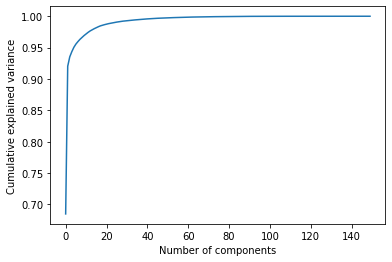

In [ ]:
#Visualization of explained variance ratio

plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
ev

array([6.84937994e-01, 2.35313708e-01, 1.49635476e-02, 8.21541515e-03,
       6.95011265e-03, 5.17010703e-03, 3.99681431e-03, 3.62359687e-03,
       3.07127396e-03, 2.93211894e-03, 2.67352983e-03, 2.49230109e-03,
       2.24688362e-03, 1.89388747e-03, 1.69433609e-03, 1.56043467e-03,
       1.53162480e-03, 1.35012976e-03, 1.00139015e-03, 9.24874864e-04,
       8.47883989e-04, 7.64383272e-04, 6.64597189e-04, 6.45674327e-04,
       6.16359544e-04, 5.61408075e-04, 5.43161049e-04, 5.15584986e-04,
       4.21073872e-04, 3.65029916e-04, 3.62710128e-04, 3.53237228e-04,
       3.24037272e-04, 3.13691524e-04, 3.03384966e-04, 2.87733955e-04,
       2.79164170e-04, 2.72731147e-04, 2.62985574e-04, 2.50311352e-04,
       2.46112664e-04, 2.32228886e-04, 2.11368520e-04, 1.94079686e-04,
       1.81978410e-04, 1.70834668e-04, 1.55749818e-04, 1.41898493e-04,
       1.37335544e-04, 1.36430923e-04, 1.33485290e-04, 1.23374762e-04,
       1.21877868e-04, 1.20990938e-04, 1.14749968e-04, 1.13124061e-04,
      

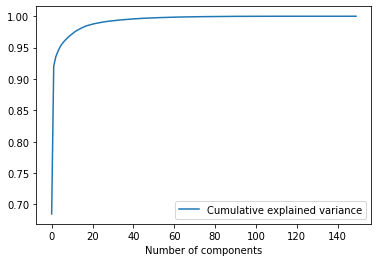

In [ ]:
# Inetactive plot
df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()
df3['Number of components'] = pd.Series(list(range(150)))
df3.plot(x='Number of components', y='Cumulative explained variance')

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

X_train.shape, X_test.shape

((17871, 150), (3154, 150))

#Implementing support vector machine (SVM)
 The support vector machine(SVM) is implemented using Radial Basis Function(RBF) kernel.

Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear classifier or regression line.

What is Kernel Function?

Kernel Function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n then find the dot product in higher dimensional efficiently. The main idea to use kernel is: A linear classifier or regression curve in higher dimensions becomes a Non-linear classifier or regression curve in lower dimensions.

In [ ]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=7168, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.7244768547875713%


# task a)

This step helps to extract more information from existing data. New information is extracted in terms of new features. These features may have a higher ability to explain the variance in the training data. Thus, giving improved model accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators =10, random_state=0).fit(X,y)
clf.score(X,y)

0.6210225921521998

#Confusion Matrix

In [ ]:
!pip install -q scikit-plot

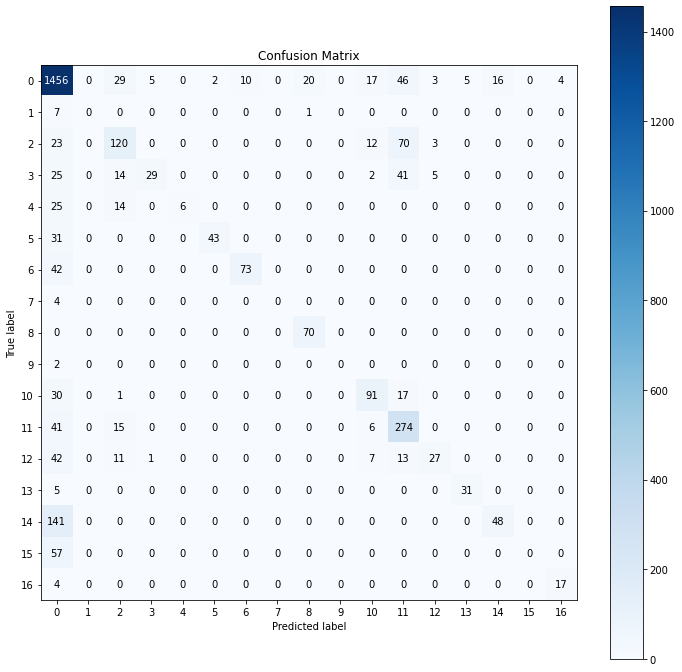

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12));

#classifcation map

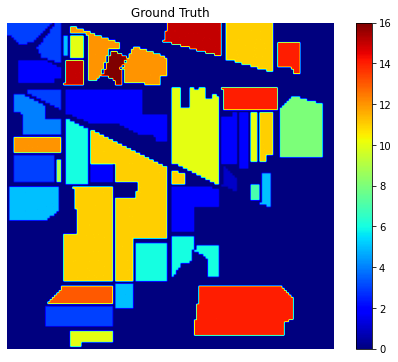

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [ ]:
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 737228.87it/s]


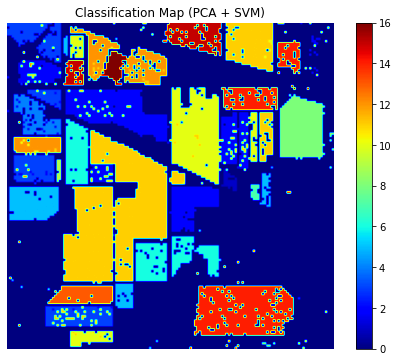

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()